# **Exploring Weather Trends Project**
## In this notebook we will be analyzing the average weather trends in New York vs average global weather trends over roughly 250 years. 

### The data has been exported from a relational database into a .csv file.
### The SQL query used to do this was: 
SELECT city_data.year,city_data.country, city_data.city, city_data.avg_temp, global_data.avg_temp AS global_avg_temp  
FROM  city_data JOIN global_data  
ON city_data.year = global_data.year  
WHERE city_data.city = 'New York';

### Let's import the data set and the libraries. 

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# read the data into a dataframe
df = pd.read_csv('results.csv')
df.head(3)

,year,country,city,avg_temp,global_avg_temp
0,1750,United States,New York,10.07,8.72
1,1751,United States,New York,10.79,7.98
2,1752,United States,New York,2.81,5.78


### Lets explore the data set by viewing the types, some statistics, and the shape.

In [2]:
# the data types are int, float and string, we are missing some data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 5 columns):
year               264 non-null int64
country            264 non-null object
city               264 non-null object
avg_temp           263 non-null float64
global_avg_temp    264 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.4+ KB


In [3]:
# already we see that the NY average/max temperature is higher than the global temperature. And, NY's min temp is significantly lower than the global min and the rest of NY temps.
# Therefore it is possible that the recorded temperature 0.25 is an error

df.describe()

,year,avg_temp,global_avg_temp
count,264.000000,263.000000,264.000000
mean,1881.500000,9.486882,8.359394
std,76.354437,1.099282,0.575184
min,1750.000000,0.250000,5.780000
25%,1815.750000,9.070000,8.077500
50%,1881.500000,9.550000,8.365000
75%,1947.250000,10.025000,8.700000
max,2013.000000,12.160000,9.730000


In [4]:
# we have 264 rows or years, and 5 columns

df.shape

(264, 5)

### We are going to keep the data types but we are going to drop rows that contain missing data

In [5]:
df.dropna(axis = 0, inplace = True)

In [6]:
df.isnull().sum()

year               0
country            0
city               0
avg_temp           0
global_avg_temp    0
dtype: int64

### Now we will create two new columns in the data frame for a 10 year moving average of the avg_temp, and global_avg_temp.

In [7]:
df['10_year_ma_temp'] = df['avg_temp'].rolling(10).mean()
df['10_year_global_ma_temp'] = df['global_avg_temp'].rolling(10).mean()

In [8]:
df.head(10)

,year,country,city,avg_temp,global_avg_temp,10_year_ma_temp,10_year_global_ma_temp
0,1750,United States,New York,10.07,8.72,NaN,NaN
1,1751,United States,New York,10.79,7.98,NaN,NaN
2,1752,United States,New York,2.81,5.78,NaN,NaN
3,1753,United States,New York,9.52,8.39,NaN,NaN
4,1754,United States,New York,9.88,8.47,NaN,NaN
5,1755,United States,New York,6.61,8.36,NaN,NaN
6,1756,United States,New York,9.94,8.85,NaN,NaN
7,1757,United States,New York,8.89,9.02,NaN,NaN
8,1758,United States,New York,8.15,6.74,NaN,NaN
9,1759,United States,New York,9.01,7.99,8.567,8.03


### Lets create a dataframe with only 10 year intervals 

In [9]:
df_ma = df.query('year % 10 == 0')  

In [10]:
df_ma.head(20)

,year,country,city,avg_temp,global_avg_temp,10_year_ma_temp,10_year_global_ma_temp
0,1750,United States,New York,10.07,8.72,NaN,NaN
10,1760,United States,New York,7.73,7.19,8.333,7.877
20,1770,United States,New York,9.04,7.69,9.089,8.032
40,1790,United States,New York,9.39,7.98,9.117,7.995
50,1800,United States,New York,9.58,8.48,9.331,8.387
60,1810,United States,New York,9.35,6.92,9.682,8.141
70,1820,United States,New York,8.98,7.62,8.501,7.322
80,1830,United States,New York,10.32,8.52,9.588,8.274
90,1840,United States,New York,9.27,7.80,8.797,7.666
100,1850,United States,New York,9.10,7.90,9.194,7.988


### Create variables for the change in 10-year moving average temperatures

In [11]:
change_ny = pd.DataFrame(df_ma['10_year_ma_temp'].diff())
change_global = pd.DataFrame(df_ma['10_year_global_ma_temp'].diff())

# Visualizations.

### Here is a line chart that compares NY 10-year moving average temperatures against global 10-year moving average temperatures.

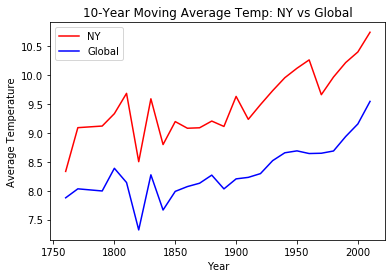

In [12]:
plt.plot('year', '10_year_ma_temp', data=df_ma, color='red', label = 'NY')
plt.plot( 'year', '10_year_global_ma_temp', data=df_ma, color='blue', label = 'Global')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('10-Year Moving Average Temp: NY vs Global')
plt.legend();

### Line chart for the change in temperature in 10 year periods.

In [13]:
x = df_ma['year']

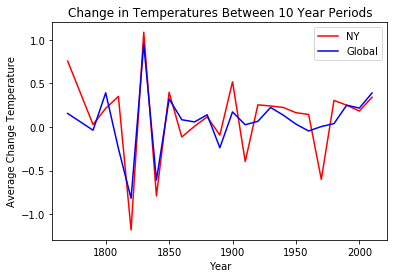

In [14]:
plt.plot(x, change_ny, color='red', label = 'NY')
plt.plot( x, change_global, color='blue', label = 'Global')
plt.xlabel('Year')
plt.ylabel('Average Change Temperature')
plt.title('Change in Temperatures Between 10 Year Periods')
plt.legend();

# Conclusion.

### Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?

The moving average of New York mean temperature is consistently greater than the moving average of global mean temperature. This means that my city is consistantly hotter than the average global temperature.

### How do the changes in your city’s temperatures over time compare to the changes in the global average?

The New York temperatures and global temperatures both follow similar trends. They both make significant dips and rise back up during the same periods of time.
They both trend upward overtime as well.

### What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?

There certainly is a positive correlation between time and warmer temperatures. Especially in the last roughly 150 years. Since around 1850 we have been in a consistent upward
trend in both global and New York temperatures.

### Is the 10-year change in temperature in NY consistent with global 10 year temperature changes?

Yes, the temperature change in NY makes almost the same fluctuations as global temperature changes. Up until the year 1900 they are nearly identical.

In [16]:
import os
os.system('jupyter nbconvert Weather_Trends.ipynb --to pdf')

0